# Esercitazione 10

## Esercizio 10.1

Implemento l'algoritmo di simulated annealing per il travelling salesman problem. Fornisco i vari parametri che diversificano le simulazioni tramite il file _input.dat_. Ho preparato dei file _input.c_ e _input.s_ per i due casi in esame (c per circonferenza, s per quadrato). Si possono eseguire tutti contemporaneamente tramite lo script _runall.py_.

Per l'esponente della funzione di selezione, che utilizzo per creare nuove generazioni di individui, scelgo $p=5$, quindi: $j = N \times r^5$. Ho osservato che, per la circonferenza, 5 mi porta a una convergenza rapida dell'algoritmo rispetto a valori più alti o più bassi. Invece per il quadrato, $p=6$ risulta essere più adatto.

Utilizzo le stesse mutazioni implementate per l'algoritmo genetico, tutte con una probabilità del 10%: 
- _randomswap_: scambia due elementi casuali nella sequenza delle città;
- _contswap_: scambia dei tratti di sequenza, di lunghezza e posizione variabile all'interno della successione di città;
- _shift_: sposta nell'ultima posizione un elemento casuale della sequenza.

Dispongo le città su una circonferenza e in un quadrato, come mostrato nella figura di seguito.

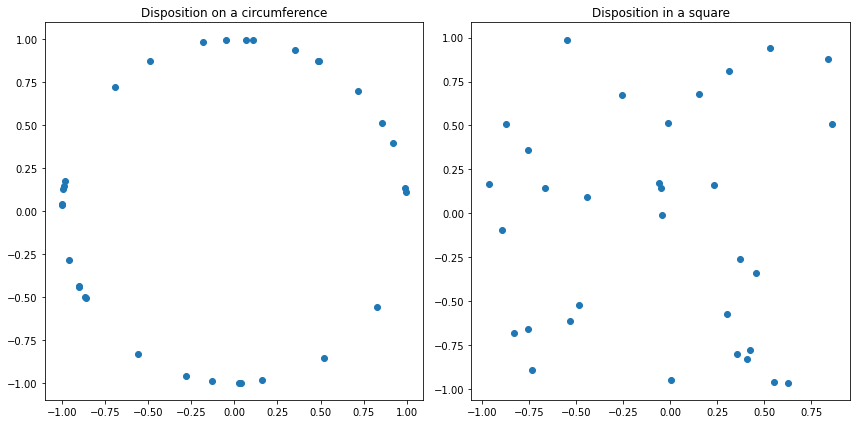

In [18]:
import numpy as np 
import matplotlib.pyplot as plt

x1,y1 = np.loadtxt("es10_1/c/cities.out", usecols=(0,1), delimiter=',', unpack='true')
x2,y2 = np.loadtxt("es10_1/s/cities.out", usecols=(0,1), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,6))
axs[0].scatter(x1,y1)
axs[0].set_title("Disposition on a circumference")
axs[1].set_title("Disposition in a square")
axs[1].scatter(x2,y2)

Eseguo la simulazione, ottenendo risultati soddisfacenti. 

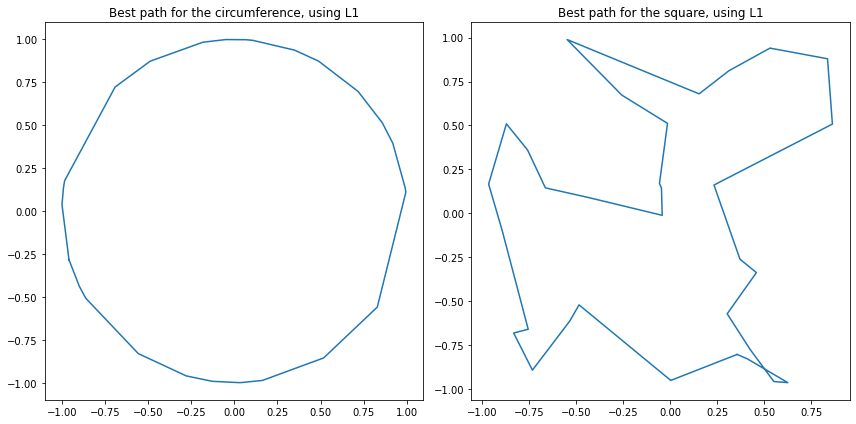

In [19]:
x1,y1 = np.loadtxt("es10_1/c/final.out", usecols=(0,1), delimiter=',', unpack='true')
x2,y2 = np.loadtxt("es10_1/s/final.out", usecols=(0,1), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,6))
axs[0].plot(x1,y1)
axs[0].set_title("Best path for the circumference, using L1")
axs[1].set_title("Best path for the square, using L1")
axs[1].plot(x2,y2)

Rappresento di seguito l'andamento della loss nei due casi. Ho regolato il numero di step Montecarlo per evitare di continuare a eseguire a lungo l'algoritmo una volta raggiunta la convergenza. In ogni blocco MC eseguo 10000 step. 

Come temperatura di partenza ho impostato 1000, e la riduco del 20% a ogni step.

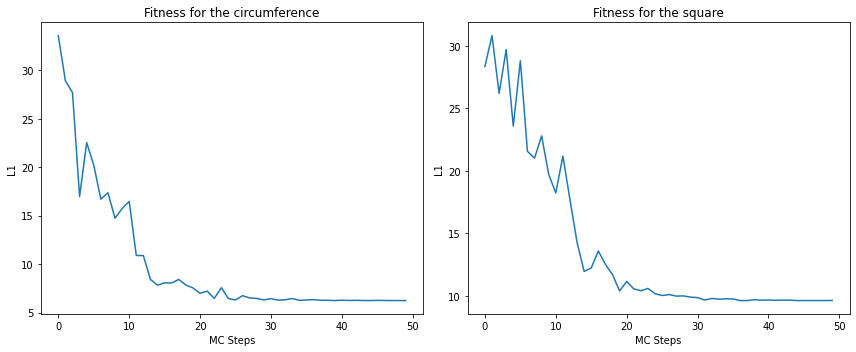

In [20]:
fit1 = np.loadtxt("es10_1/c/fitness.out", usecols=(0), delimiter=',', unpack='true')
fit2 = np.loadtxt("es10_1/s/fitness.out", usecols=(0), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,5))
axs[0].plot(fit1)
axs[0].set_ylabel("L1")
axs[0].set_xlabel("MC Steps")
axs[0].set_title("Fitness for the circumference")
axs[1].set_title("Fitness for the square")
axs[1].set_ylabel("L1")
axs[1].set_xlabel("MC Steps")
axs[1].plot(fit2)

## Esercizio 10.2

Ho implementato un programma che utilizza da 1 a 4 _continenti_, ovvero da 1 a 4 core, per individuare il cammino migliore. Ogni 20 generazioni questi continenti si scambiano tra loro in maniera casuale i migliori individui. Con lo script _runall.py_ il programma viene eseguito per tutte e 4 le casistiche. 

Per evitare che ogni search ottenga gli stessi risultati, devo inizializzare con diversi seed il generatore di numeri random. Ogni generazione ha 400 individui e per il parametro dell'algoritmo di selezione pongo $p=6$.

Confronto di seguito i risultati e le performance.

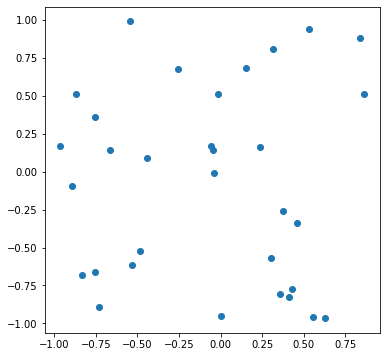

In [21]:
# Disposition of the cities inside a square
x,y = np.loadtxt("es10_2/results/cities_1.out", usecols=(0,1), delimiter=',', unpack='true')

plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.show()

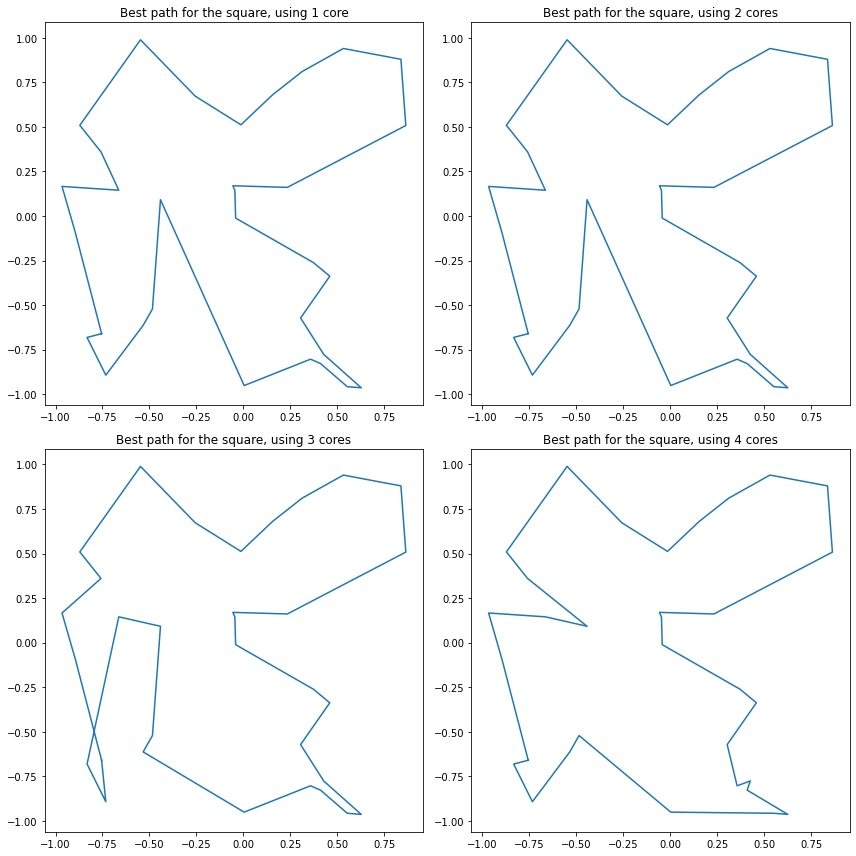

In [22]:
x1,y1 = np.loadtxt("es10_2/results/final_1.out", usecols=(0,1), delimiter=',', unpack='true')
x2,y2 = np.loadtxt("es10_2/results/final_2.out", usecols=(0,1), delimiter=',', unpack='true')
x3,y3 = np.loadtxt("es10_2/results/final_3.out", usecols=(0,1), delimiter=',', unpack='true')
x4,y4 = np.loadtxt("es10_2/results/final_4.out", usecols=(0,1), delimiter=',', unpack='true')

fig, axs = plt.subplots(2, 2, tight_layout=True, figsize=(12,12))

axs[0][0].set_title("Best path for the square, using 1 core")
axs[0][0].plot(x1,y1)
axs[0][1].set_title("Best path for the square, using 2 cores")
axs[0][1].plot(x2,y2)
axs[1][0].set_title("Best path for the square, using 3 cores")
axs[1][0].plot(x3,y3)
axs[1][1].set_title("Best path for the square, using 4 cores")
axs[1][1].plot(x4,y4)

Salvo e rappresento la fitness ottenuta dal continente 0, e confronto l'andamento all'aumentare del numero di continenti.

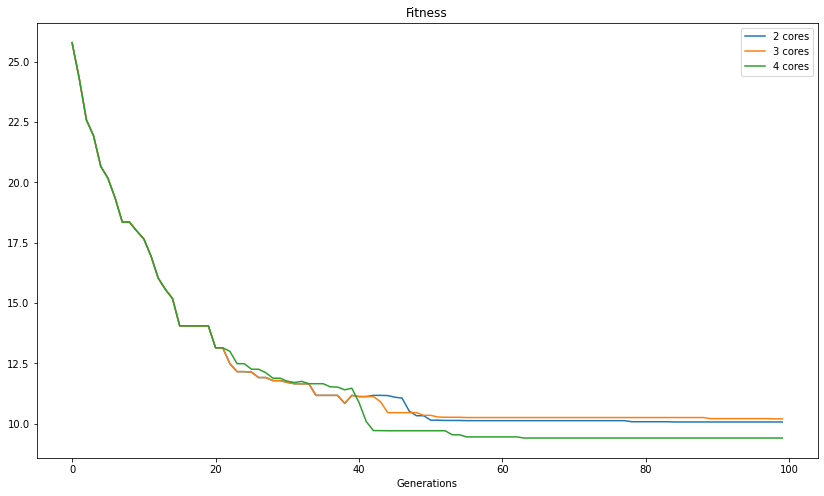

In [23]:
fit1 = np.loadtxt("es10_2/results/fitness_1.out", usecols=(0), delimiter=',', unpack='true')
fit2 = np.loadtxt("es10_2/results/fitness_2.out", usecols=(0), delimiter=',', unpack='true')
fit3 = np.loadtxt("es10_2/results/fitness_3.out", usecols=(0), delimiter=',', unpack='true')
fit4 = np.loadtxt("es10_2/results/fitness_4.out", usecols=(0), delimiter=',', unpack='true')

plt.figure(figsize=[14,8])
#plt.plot(fit1, label = '1 core')
plt.plot(fit2, label = '2 cores')
plt.plot(fit3, label = '3 cores')
plt.plot(fit4, label = '4 cores')
plt.xlabel("Generations")
plt.title("Fitness")
plt.legend()

L'andamento della fitness nei diversi casi talvolta si sovrappone, quando il miglior cammino che viene ottenuto e poi mantenuto è lo stesso. 

Non trattandosi di un problema particolarmente complesso e tenendo conto di un solo parametro (la fitness), variando i seed del generatore random i risultati che si ottengono potrebbero essere diversi e talvolta controintuitivi. Ovvero, utilizzando 1 o 2 core potrebbe capitare di giungere più rapidamente al best path rispetto a quando se ne utilizzano 3 o 4, poichè casualmente si può incorrere prima in una sequenza migliore. 

Nonostante questo, utilizzando 4 core osservo un comportamento migliore rispetto ai casi 2 e 3.